In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import scipy
import scipy.stats
import scipy.integrate

# Thème 3 : Analyse Bayésienne

## Jeu du pile ou face

On souhaite estimer, à partir d'un série de N mesures au jeu de pile ou face, la probabilité $p$ d'obtenir pile.
Pour cela, dans le cadre de l'analyse bayésienne on va considérer $p$ comme une variable aléatoire et on va construire sa fonction densité de probabilité à l'aide du théorème de Bayes~(on suppose que l'on a observé n piles parmi les N mesures):

$$ f_N(p|n) \propto P_N(n|p) \times \pi (p) $$

où $f_N(p|n)$ est la fonction de distribution associée à $p$, $P_N(n|p)$ est la probabilité d'observer $n$ piles
parmi $N$ mesures pour un $p$ donné (fonction de vraisemblance) et $\pi(p)$ est la fonction densité de
probabilité associée à $p$ à priori (ce que l'on appelle le prior).

1. Donner la forme de $P_N(n|p)$.


 La probabilité d'avoir n piles sachant la valeur de p est donné par une loi binomiale.

 $P_N(n|p) = {n \choose k} p^k (1-p)^{n-k}$

2. Simuler une série de $128$ mesures effectuées avec $p=.8$ et stocker les résultats dans un vecteur.


In [117]:
#Là on simule PN(n|p) car on a N = 128 lancés, et on connaît p=0.8. 

vecteur = np.random.random(128)<=0.8
n = np.sum(vecteur)
print('Nombre de piles =',n)
    

Nombre de piles = 98



Dans la suite, on prend comme prior $\pi (p) = 1$ (toutes les valeurs de $p$ sont équiprobables).

3. Représenter $f_{N}(p|n)$ pour N = 1, 2, 4, 8, 16, 32, 64, 128. On prendra soin de normaliser la fonction densité
de probabilité (on peut utiliser la méthode `scipy.integrate.simps` pour intégrer numériquement
une fonction entre $a$ et $b$). 


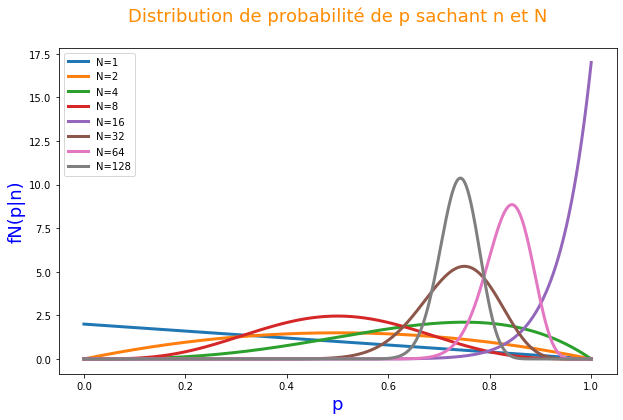


fN(p|n), c est la probabilité d avoir p, sachant que l on a obtenu n piles pour N lancés.
 



In [125]:
fig, ax1 = plt.subplots(1, figsize=(10,6))

for N in [2**i for i in range(8)]:
    mesures = np.random.random(128)<=0.8
    p = np.linspace(0, 1, 1000)
    n = np.sum(mesures[:N])
    # J'ai rajouté le coefficient binomial ..
    y = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)
    norm = scipy.integrate.simps(y, p)
    ax1.plot(p, y/norm, label=f'N={N}', lw = 3) 
    ax1.legend()
    
class color:
   PURPLE = '\033[95m'
   BOLD = '\033[1m'
   END = '\033[0m'

ax1.set_xlabel('p', fontsize =18, color = 'b')
ax1.set_ylabel('fN(p|n)', fontsize =18, color = 'b')
ax1.set_title('Distribution de probabilité de p sachant n et N\n', fontsize = 18, color='darkorange')
plt.show()
print(color.PURPLE + color.BOLD +'\nfN(p|n), c est la probabilité d avoir p, sachant que l on a obtenu '
      'n piles pour N lancés.\n \n'+ color.END)


4. Pour chaque cas, en déduire la valeur la plus probable de $p$ : $p_{MV}$ (on peut utiliser la fonction `np.argmax`), comparer à la valeur théorique. Calculer la variance $\sigma^2$ de $p$.


5. En déduire le niveau de confiance associé à l'intervalle $[ p_{MV}-\sigma, p_{MV}+\sigma ]$.

In [145]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

for N in [2**i for i in range(8)]:
    
    mesures = np.random.random(1000)<=0.8
    p = np.linspace(0, 1, 10000)
    n = np.sum(mesures[:N])
    
    def f(x) :
        return (scipy.special.binom(N,n)*x**n*(1-x)**(N-n))/norm
   
    x = np.linspace(0, 1, 10000)
    y = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)
    norm = scipy.integrate.simps(y, p)
    popt,pcov = scipy.optimize.curve_fit(gaussian,p, y/norm)
    niveau_confiance = scipy.integrate.quad(f, p[np.argmax(y/norm)] - popt[1] , p[np.argmax(y/norm)] + popt[1])
    
    print(color.DARKCYAN + '\nNombre de lancés :'+ color.END, N)
    print(color.BLUE +'Valeur la plus probable de p :'+ color.END,np.round(p[np.argmax(y/norm)],4))
    print(color.GREEN +'Variance de la distribution de p :'+ color.END, np.round(popt[1]**2,4))
    print(color.PURPLE +'Ecart à la valeur théorique de p :'+ color.END, np.round(abs(0.8-p[np.argmax(y/norm)]),4))
    print(color.BLUE +'niveau de confiance :'+ color.END, np.round(niveau_confiance[0]*100,2),'%' )
    print(color.GREEN +'Ecart au niveau de confiance théorique :'+ color.END, np.round(abs(0.682-niveau_confiance[0])*100,2),'%' )
 
print(color.PURPLE + color.BOLD +'\nPlus N est grand, plus on tend vers pmv = 0.8, et plus la variance diminue.'+ color.END)
print(color.PURPLE + color.BOLD +'\nLe niveau de confiance défini comme l intégrale de la distribution entre les bornes sus-citées, '
      'tend vers sa valeur\ncaractéristique pour une gaussienne, à savoir 68.2%.'+ color.END)


Nombre de lancés : 1
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0659
Ecart à la valeur théorique de p : 0.2
niveau de confiance : 102.72 %
Ecart au niveau de confiance théorique : 34.52 %

Nombre de lancés : 2
Valeur la plus probable de p : 0.4999
Variance de la distribution de p : 0.0671
Ecart à la valeur théorique de p : 0.3001
niveau de confiance : 70.76 %
Ecart au niveau de confiance théorique : 2.56 %

Nombre de lancés : 4
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0125
Ecart à la valeur théorique de p : 0.2
niveau de confiance : 114.49 %
Ecart au niveau de confiance théorique : 46.29 %

Nombre de lancés : 8
Valeur la plus probable de p : 0.875
Variance de la distribution de p : 0.0141
Ecart à la valeur théorique de p : 0.075
niveau de confiance : 68.32 %
Ecart au niveau de confiance théorique : 0.12 %

Nombre de lancés : 16
Valeur la plus probable de p : 0.6875
Variance de la distribution de p : 0.0122
Ecart à la valeur t

6. Comment évoluent les  résultats obtenus si on prend un autre prior ? essayer par exemple $\pi (p) = 2 p$ ou
 $\pi (p) = 3 p^2$.


Prior = 1 :
Nombre de lancés : 1
Valeur la plus probable de p : 1.0
Ecart à la valeur théorique de p : 0.2

Prior = 2p :
Nombre de lancés : 1
Valeur la plus probable de p : 1.0
Ecart à la valeur théorique de p : 0.2

Prior = 3p² :
Nombre de lancés : 1
Valeur la plus probable de p : 1.0
Ecart à la valeur théorique de p : 0.2

Prior = 1 :
Nombre de lancés : 2
Valeur la plus probable de p : 1.0
Ecart à la valeur théorique de p : 0.2

Prior = 2p :
Nombre de lancés : 2
Valeur la plus probable de p : 1.0
Ecart à la valeur théorique de p : 0.2

Prior = 3p² :
Nombre de lancés : 2
Valeur la plus probable de p : 1.0
Ecart à la valeur théorique de p : 0.2

Prior = 1 :
Nombre de lancés : 4
Valeur la plus probable de p : 0.7497
Ecart à la valeur théorique de p : 0.0503

Prior = 2p :
Nombre de lancés : 4
Valeur la plus probable de p : 0.7998
Ecart à la valeur théorique de p : 0.0002

Prior = 3p² :
Nombre de lancés : 4
Valeur la plus probable de p : 0.8328
Ecart à la valeur théorique de p : 0.0328



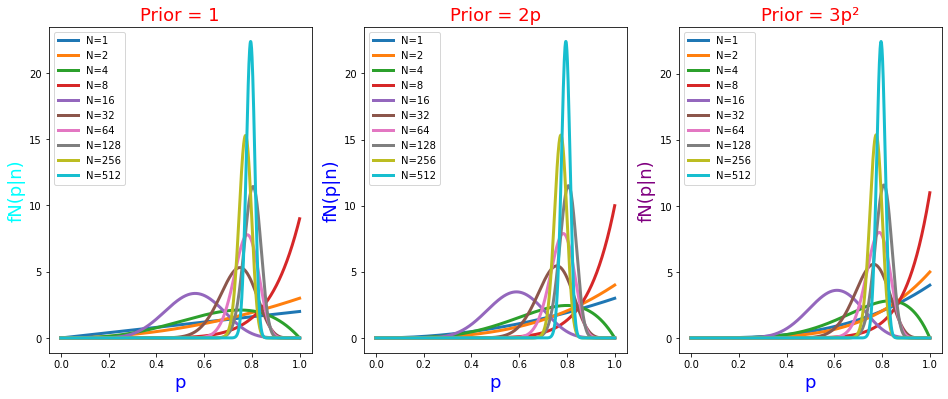

Plus la puissance de p dans le prior est grande et plus les petits N se rapprochent rapidement de p=0.8. 
Nous pouvons le voir assez clairement sur les 3 graphiques jusqu à N = 4, mais également numériquement 
grâce à l écart à la valeut théorique de p.

Afin de montrer uniquement l influence du prior, les graphiques sont réalisés à partir des mêmes mesures.


In [170]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))

for N in [2**i for i in range(10)]:
    r = np.random.random(1000)<=0.8
    p = np.linspace(0, 1, 1000)
    n = np.sum(r[:N])
    y1 = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)
    y2 = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)*2*p
    y3 = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)*3*p**2
    norm1 = scipy.integrate.simps(y1, p)
    norm2 = scipy.integrate.simps(y2, p)
    norm3 = scipy.integrate.simps(y3, p)
    ax1.plot(p, y1/norm1, label=f'N={N}', lw = 3) 
    ax1.set_xlabel('p', fontsize =18, color = 'b')
    ax1.set_ylabel('fN(p|n)', fontsize =18, color = 'cyan')
    ax1.set_title('Prior = 1', color = 'r', fontsize =18)
    ax1.legend()
    ax2.plot(p, y2/norm2, label=f'N={N}', lw = 3)
    ax2.set_xlabel('p', fontsize =18, color = 'b')
    ax2.set_ylabel('fN(p|n)', fontsize =18, color = 'b')
    ax2.set_title('Prior = 2p', color = 'r', fontsize =18)
    ax2.legend()
    ax3.plot(p, y3/norm3, label=f'N={N}', lw = 3)
    ax3.set_xlabel('p', fontsize =18, color = 'b')
    ax3.set_ylabel('fN(p|n)', fontsize =18, color = 'purple')
    ax3.set_title('Prior = 3p²', color = 'r', fontsize =18)
    ax3.legend()
    
    if N< 20 :
        
        print('\nPrior = 1 :')
        print(color.DARKCYAN + 'Nombre de lancés :'+ color.END, N)
        print(color.BLUE +'Valeur la plus probable de p :'+ color.END,np.round(p[np.argmax(y1/norm1)],4))
        print(color.PURPLE +'Ecart à la valeur théorique de p :'+ color.END, np.round(abs(0.8-p[np.argmax(y1/norm1)]),4))

        print('\nPrior = 2p :')
        print(color.DARKCYAN + 'Nombre de lancés :'+ color.END, N)
        print(color.BLUE +'Valeur la plus probable de p :'+ color.END,np.round(p[np.argmax(y2/norm2)],4))
        print(color.PURPLE +'Ecart à la valeur théorique de p :'+ color.END, np.round(abs(0.8-p[np.argmax(y2/norm2)]),4))

        print('\nPrior = 3p² :')
        print(color.DARKCYAN + 'Nombre de lancés :'+ color.END, N)
        print(color.BLUE +'Valeur la plus probable de p :'+ color.END,np.round(p[np.argmax(y3/norm3)],4))
        print(color.PURPLE +'Ecart à la valeur théorique de p :'+ color.END, np.round(abs(0.8-p[np.argmax(y3/norm3)]),4))

plt.show()

print(color.PURPLE + color.BOLD +'Plus la puissance de p dans le prior est grande et plus les petits N se rapprochent rapidement de p=0.8. '
      '\nNous pouvons le voir assez clairement sur les 3 graphiques jusqu à N = 4, mais également numériquement \ngrâce à l écart'
      ' à la valeut théorique de p.'+ color.END)
print(color.PURPLE + color.BOLD +'\nAfin de montrer uniquement l influence du prior, les graphiques sont réalisés à partir des mêmes mesures.'+ color.END)
      


## Loi exponentielle

On souhaite estimer le paramètre $\lambda$ d'une loi exponentielle de fonction densité de probabilité :

$$f(x) = \left\{ \begin{array}{ll} \lambda \exp ( -\lambda x ) & \textrm{pour } x\ge 0 \\
0 & \textrm{sinon} \end{array} \right.$$

à partir d'une série de $N$ mesures ${x_1, x_2,\ldots,x_N}$. Dans le cadre de l'analyse bayésienne, on va
construire la fonction densité de probabilité associée au paramètre $\lambda$ sous la forme~:

$$ f(\lambda | {x_1, x_2,\ldots,x_N} ) \propto L({x_1, x_2,\ldots,x_N}|\lambda) \times \pi (\lambda) $$

où $ L({x_1, x_2,\ldots,x_N}|\lambda) $ est la fonction de vraisemblance.

1. Donner la forme de $ L({x_1, x_2,\ldots,x_N}|\lambda) $ :



 $ L({x_1, x_2,\ldots,x_N}|\lambda) = \prod_{i = 1}^{n} \lambda \exp ( -\lambda xi ) = \lambda^{n} \exp ( -\lambda \sum_{i = 1}^{n} xi )$
 
Son logarithme népérien vaut donc :

$$ \ln L (\tau) =  n \ln \lambda - \lambda \sum_i x_i $$





2. Simuler une série de $128$ mesures effectuées avec $\lambda=.5$ et stocker le résultat des mesures dans un vecteur.


In [179]:
vecteur =np.random.exponential(2, 128)

print('\nAttention np.random.exponential prend comme argument 1/Lambda\n')


Attention np.random.exponential prend comme argument 1/Lambda



Dans la suite, on prend comme prior $\pi (\lambda) = \textrm{cst}$ pour $ 0 \le \lambda \le 3 $


3. Représenter $ f(\lambda | {x_1, x_2,\ldots,x_N}) $ pour N = 1, 2, 4, 8, 16, 32, 64, 128.


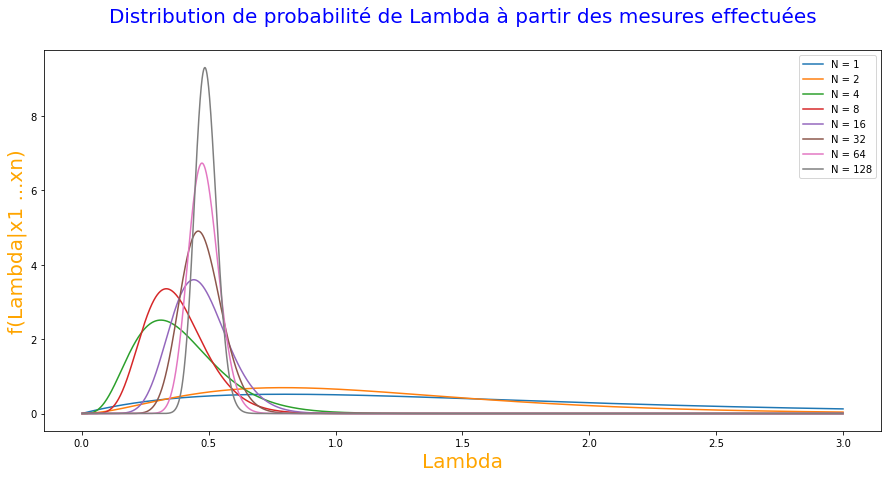

In [233]:
#Attention il faut prendre 2 en argument car 2 = 1/0.5.
vecteur = np.random.exponential(2, 128)

plt.figure(figsize=[15, 7]) 

def ln_vraisemblance(Lambda, vecteur):
    return len(vecteur) * np.log(Lambda) - np.sum(vecteur) * Lambda

def ln_prior(Lambda): 
    return 0

def ln_postérior(Lambda, vecteur):
    ln_vraisemblance(Lambda, vecteur) + ln_prior(Lambda)
    
Lambda = np.linspace(0.001, 3, 10000)


for n in [2**i for i in range(8)]:
    log_y = ln_vraisemblance(Lambda, vecteur[:n]) + ln_prior (Lambda)
    y = np.exp(log_y-np.max(log_y))
    norm = scipy.integrate.simps(y, Lambda)
    plt.plot(Lambda, y/norm, label=f'N = {n}')
    plt.xlabel('Lambda', color='orange', fontsize = 20)
    plt.ylabel('f(Lambda|x1 ...xn)', color='orange', fontsize = 20)
    plt.title('Distribution de probabilité de Lambda à partir des mesures effectuées\n', color='b', fontsize = 20)
plt.legend()
plt.show()



4. Pour chaque cas, en déduire la valeur plus probable de $\lambda_{MV}$ et sa variance $\sigma^2$.

5. En déduire le niveau de confiance associé à l'intervalle $[\lambda_{MV}-\sigma, \lambda_{MV}+\sigma]$.

In [307]:
class color:
   PURPLE = '\033[95m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

vecteur = np.random.exponential(2, 128)

def ln_vraisemblance(Lambda, vecteur):
    return len(vecteur) * np.log(Lambda) - np.sum(vecteur) * Lambda

#Comme le prior doit être constant, j'ai pris 1.
def ln_prior(Lambda): 
    return 0

def ln_postérior(Lambda, vecteur):
    ln_vraisemblance(Lambda, vecteur) + ln_prior(Lambda)
    
Lambda = np.linspace(0.001, 3, 10000)


for n in [2**i for i in range(8)]:
    log_y = ln_vraisemblance(Lambda, vecteur[:n]) + ln_prior (Lambda)
    y = np.exp(log_y-np.max(log_y))
    norm = scipy.integrate.simps(y, Lambda)
    popt,pcov = scipy.optimize.curve_fit(gaussian,Lambda,y/norm)
    
    def f(x):
        return (np.exp(n*np.log(x) - np.sum(vecteur[:n])*x-np.max(log_y)))/norm
    
    print(color.BOLD +'\nPour n ='+ color.END, n)
    print(color.BOLD +'Valeur la plus probable de Lambda :'+ color.END,np.round(Lambda[np.argmax(y/norm)],4))
    print(color.BOLD +'Ecart à la valeur théorique :'+ color.END, np.round(abs(0.5 -Lambda[np.argmax(y/norm)]),4))
    print(color.BOLD +'Variance de la distribution de Lambda :'+ color.END, np.round(popt[1]**2,4))
    if n > 1 :
        niveau_confiance = scipy.integrate.quad(f, Lambda[np.argmax(y/norm)] - popt[1] , Lambda[np.argmax(y/norm)] + popt[1])
        print(color.RED +color.BOLD + 'Niveau de confiance'+ color.END, np.round((niveau_confiance[0]*100),2), '%')

print(color.PURPLE +color.BOLD +'\nOn tend bien vers un niveau de confiance de 68.2%, qui est celui d une gaussienne pour 1 sigma.')
print(color.PURPLE +color.BOLD +'Je n ai pas calculé celui pour n=1, car la distribution est parfois tellement éloignée de celle d une gaussienne'
     ' qu il y a une erreur dans le calcul de l intégrale.')


Pour n = 1
Valeur la plus probable de Lambda : 0.5652
Ecart à la valeur théorique : 0.0652
Variance de la distribution de Lambda : 0.4237

Pour n = 2
Valeur la plus probable de Lambda : 0.5409
Ecart à la valeur théorique : 0.0409
Variance de la distribution de Lambda : 0.1713
Niveau de confiance 67.34 %

Pour n = 4
Valeur la plus probable de Lambda : 0.4005
Ecart à la valeur théorique : 0.0995
Variance de la distribution de Lambda : 0.0423
Niveau de confiance 67.41 %

Pour n = 8
Valeur la plus probable de Lambda : 0.4956
Ecart à la valeur théorique : 0.0044
Variance de la distribution de Lambda : 0.0313
Niveau de confiance 67.7 %

Pour n = 16
Valeur la plus probable de Lambda : 0.3474
Ecart à la valeur théorique : 0.1526
Variance de la distribution de Lambda : 0.0076
Niveau de confiance 67.98 %

Pour n = 32
Valeur la plus probable de Lambda : 0.3813
Ecart à la valeur théorique : 0.1187
Variance de la distribution de Lambda : 0.0046
Niveau de confiance 68.12 %

Pour n = 64
Valeur la pl

## Loi gaussienne

On souhaite estimer les paramètres $\mu$ et $\sigma$ d'une loi gaussienne de fonction densité de probabilité :

$$f(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( - \frac{(x-\mu)^2}{2\sigma^2}\right)$$

à partir d'une série de $N=1000$ mesures ${x_1, x_2,\ldots,x_N}$ avec  $\mu=1$ et $\sigma=2$ , utiliser la bibliothèque `emcee` (https://emcee.readthedocs.io/) pour estimer les lois de distribution associées aux paramètres $\mu$ et $\sigma$. Discuter le choix des priors.

In [ ]:
mesures = np.random.normal(1, 2, 1000)

In [ ]:
def ln_vraisemblance(paramètres, mesures):
    return -len(mesures) * np.log(paramètres[1]) - .5 * np.sum(np.square(mesures - paramètres[0])/paramètres[1])

In [ ]:
#prior = 1 donc ln(prior) = 0
def ln_prior(paramètres):
    return 0  

In [ ]:
def ln_posterior(paramètres, mesures):
    return ln_vraisemblance(paramètres, mesures) + ln_prior(paramètres)

In [ ]:
import emcee
nombre_chaînes = 12
#Il faut faire 2 colonnes, une pour mu, une autre pour sigma
p0 = np.random.random(size=(nombre_chaînes, 2))+1
échantillonneur = emcee.EnsembleSampler(nombre_chaînes, 2, ln_posterior, args=[mesures,])
échantillonneur.run_mcmc(p0, 10000)
plt.show()

In [ ]:
échantillons = échantillonneur.get_chain()
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))

ax1.plot(échantillons[:, :, 0], alpha=0.4)
ax1.set_ylim(0, 2)
ax1.set_xlim(0, len(échantillons))
ax1.set_ylabel('mu',  fontsize = 18)
ax1.yaxis.set_label_coords(-0.08, 0.5)
ax1.set_xlabel("Nombre de pas", fontsize = 16)

ax2.plot(échantillons[:, :, 1], alpha=0.4)
ax2.set_ylim(0, 4)
ax2.set_xlim(0, len(échantillons))
ax2.set_ylabel('sigma', fontsize = 18)
ax2.yaxis.set_label_coords(-0.08, 0.5)
ax2.set_xlabel("Nombre de pas", fontsize = 16)

plt.show()

In [ ]:
print('\nLes lois de distribution associées à mu et sigma sont des constantes égales à celles indiquées pour générer les mesures.')
print('La superposition des valeurs prises par les 12 chaînes oscillent dans une barre d erreur de 0.3.')
print('Si le prior est une constante sa valeur n a pas d incidence, car elle change juste la normalisation de la densité de probabilité.')